In [1]:
import numpy as np
import matplotlib.pyplot as plt
# get quad
from scipy.integrate import quad
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [2]:
def merger_rate_density_bbh_popI_II_oguri2018(
        zs, R0=23.9 * 1e-9, b2=1.6, b3=2.1, b4=30,
    ):
    # rate_density
    return R0 * (b4 + 1) * np.exp(b2 * zs) / (b4 + np.exp(b3 * zs))

intergrand = lambda zs: merger_rate_density_bbh_popI_II_oguri2018(np.array([zs]))[0] /(1+zs) * cosmo.differential_comoving_volume(zs).value *4*np.pi

integral = quad(intergrand, 0.001, 10)[0]

In [3]:
integral, merger_rate_density_bbh_popI_II_oguri2018(np.array([0.]))[0]

(82226.82201081667, 2.39e-08)

In [4]:
from ler.gw_source_population import CBCSourceParameterDistribution
cbc = CBCSourceParameterDistribution(event_type='BBH', create_new_interpolator=True)

GWSNR: Setting multiprocessing start method to 'fork'.


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be generated at ./interpolator_json/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be generated at ./interpolator_json/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_22.pickle
merger_rate_density_detector_frame interpolator will be generated at ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_23.pickle
using user provided custom source redshift class/object

Initializing CBCSourceParameterDistribution...

using ler available zs function : source_redshift
using ler available source_frame_masses function : binary

In [5]:
cbc.normalization_pdf_z, cbc.merger_rate_density_param

(82226.82207374912, {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30})

In [7]:
intergrand = lambda zs: cbc.merger_rate_density_detector_frame(np.array([zs]))[0]

integral = quad(intergrand, 0.001, 10)
integral

(82226.82207092414, 7.956882360105055e-06)

In [8]:
cbc.merger_rate_density_detector_frame.pdf_norm_const

82226.82207374912

In [9]:
cbc.merger_rate_density(np.array([0]))

array([2.39e-08])

In [10]:
intergrand = lambda zs: cbc.merger_rate_density(np.array([zs]))[0] /(1+zs) * cosmo.differential_comoving_volume(zs).value *4*np.pi

integral = quad(intergrand, 0.001, 10)[0]
integral

82226.82199920547

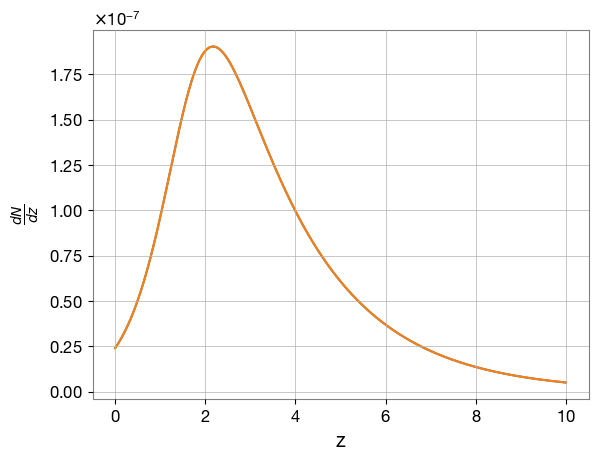

In [11]:
# plot cbc.merger_rate_density
zs = np.linspace(0.001, 10, 1000)
plt.plot(zs, cbc.merger_rate_density(zs), label='ler')
# merger_rate_density_bbh_popI_II_oguri2018
plt.plot(zs, merger_rate_density_bbh_popI_II_oguri2018(zs), label='oguri')
plt.xlabel("z")
plt.ylabel(r"$\frac{dN}{dz}$")
plt.show()